<a href="https://colab.research.google.com/github/wilberj88/Ascenso/blob/main/HR_Analytic_Clustering_using_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install PyCaret**

In [ ]:
!pip install pycaret==2.1

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
from pycaret.clustering import *
import matplotlib.pyplot as plt
import seaborn as sns

**Get data**

In [ ]:
dataset="https://github.com/live2pro/dataset/raw/master/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df=pd.read_csv(dataset)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Create dataframe filtering only Attrition=Yes**

In [ ]:
df_leave=df[df['Attrition']=='Yes']

**setup pycaret**

In [ ]:
cluster = setup(df_leave, normalize = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,6663
1,Original Data,"(237, 35)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,27
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(237, 151)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


**Create model using kmean with 4 clusters**

In [ ]:
kmeans = create_model('kmeans', num_clusters = 4)

,Metric
Silhouette,0.0457
Calinski-Harabasz,15.3020
Davies-Bouldin,3.4006


In [ ]:
kmean_results = assign_model(kmeans)

**Preview Result from kmean algorithm**

In [ ]:
result_preview=kmean_results[['Age','Attrition','Cluster']]


In [ ]:
result_preview

,Age,Attrition,Cluster
0,41,Yes,Cluster 0
2,37,Yes,Cluster 3
14,28,Yes,Cluster 3
21,36,Yes,Cluster 3
24,34,Yes,Cluster 3
...,...,...,...
1438,23,Yes,Cluster 1
1442,29,Yes,Cluster 3
1444,56,Yes,Cluster 3
1452,50,Yes,Cluster 0


In [ ]:
kmean_results.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Cluster 0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Cluster 3


**Exploraty Data Analytic with 4 leaved employees clusters**

Text(0.5, 1.0, 'Monthly Income of 4 Clusters')

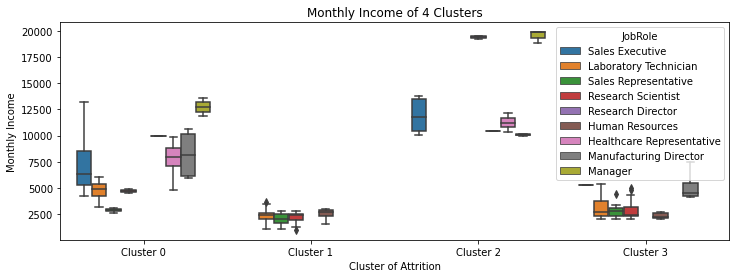

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(y='MonthlyIncome', x='Cluster', data=kmean_results,
            hue='JobRole',
            order=['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'])
plt.ylabel('Monthly Income')
plt.xlabel('Cluster of Attrition')
plt.title('Monthly Income of 4 Clusters')

In [ ]:
cls=kmean_results.groupby(['Cluster','JobRole']).agg({'EmployeeNumber':'count'})
cls=cls.reset_index()


Text(0.5, 1.0, 'Cluster of Attrition by Job Role')

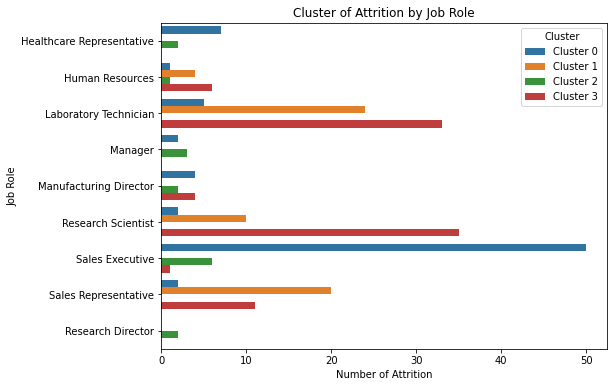

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(y='JobRole', x='EmployeeNumber', data=cls,
            hue='Cluster')
plt.ylabel('Job Role')
plt.xlabel('Number of Attrition')
plt.title('Cluster of Attrition by Job Role')

Text(0.5, 1.0, 'Cluster of Attrition by Job Role')

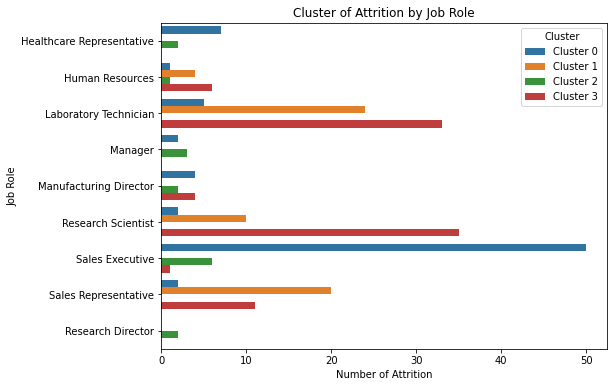

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(y='JobRole', x='EmployeeNumber', data=cls,
            hue='Cluster')
plt.ylabel('Job Role')
plt.xlabel('Number of Attrition')
plt.title('Cluster of Attrition by Job Role')

In [ ]:
kmean_results['Cluster'].value_counts().sort_values()

Cluster 2    16
Cluster 1    58
Cluster 0    73
Cluster 3    90
Name: Cluster, dtype: int64

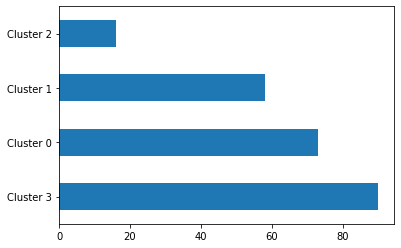

In [ ]:
kmean_results['Cluster'].value_counts().plot.barh();

In [ ]:
year=kmean_results.groupby(['Cluster']).agg({"YearsInCurrentRole":"mean",
"YearsAtCompany":"mean","YearsSinceLastPromotion":"mean","YearsWithCurrManager":"mean"})

In [ ]:
year

,YearsInCurrentRole,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Cluster,,,,
Cluster 0,3.835616,5.657534,2.438356,3.575342
Cluster 1,0.241379,0.896552,0.206897,0.224138
Cluster 2,8.187500,20.937500,7.437500,7.750000
Cluster 3,2.922222,4.622222,1.688889,3.088889


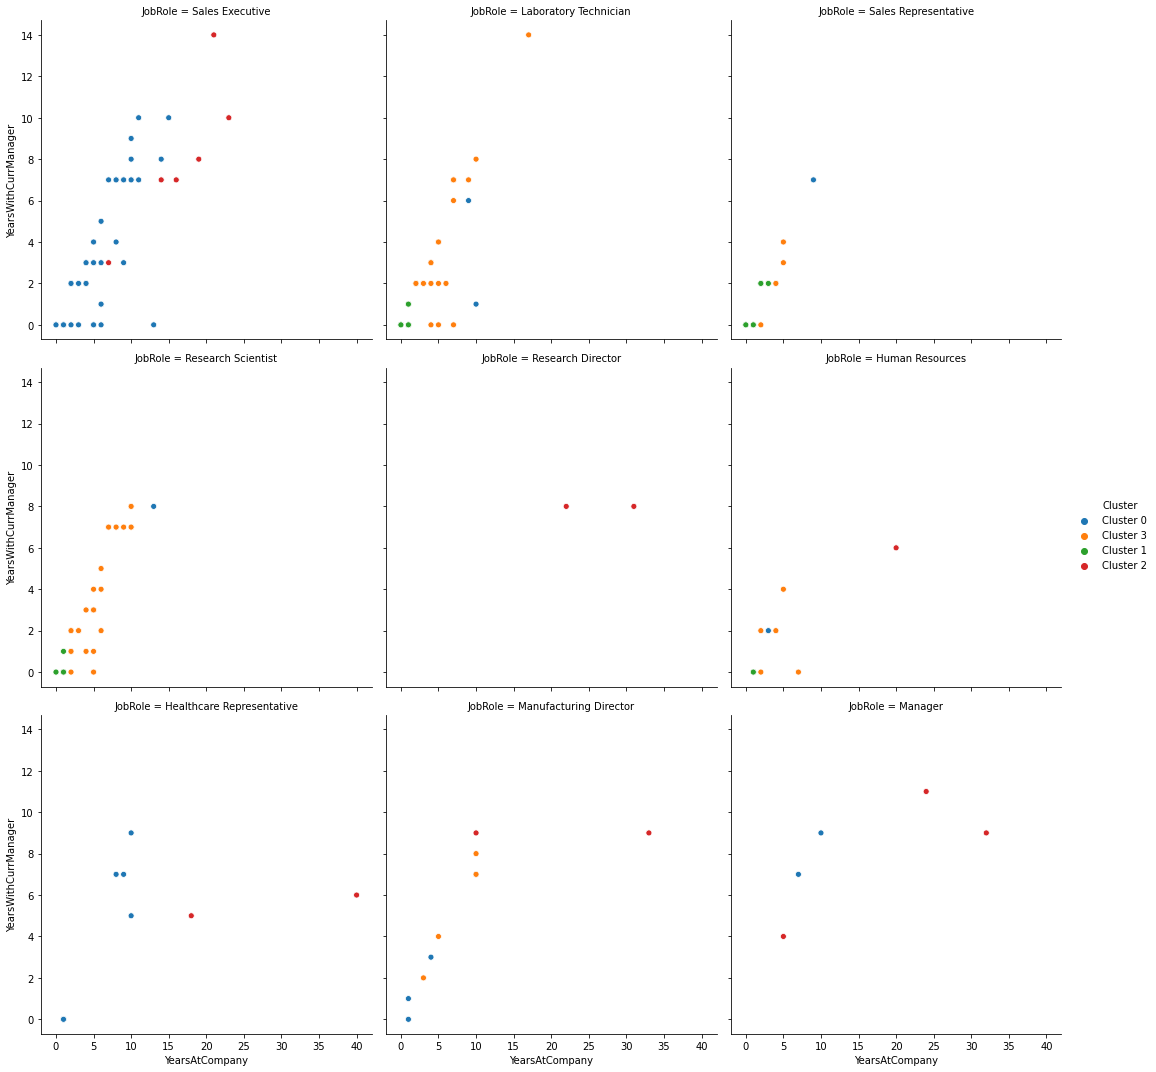

In [ ]:
g = sns.relplot(x="YearsAtCompany", y="YearsWithCurrManager", 
                hue="Cluster", col="JobRole", col_wrap=3,
                data=kmean_results)

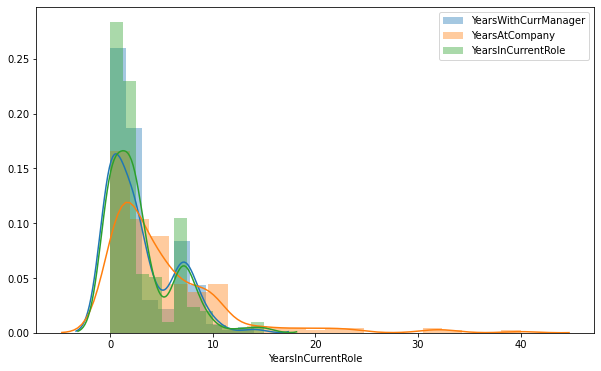

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(kmean_results['YearsWithCurrManager'],label="YearsWithCurrManager")
sns.distplot(kmean_results['YearsAtCompany'],label="YearsAtCompany")
sns.distplot(kmean_results['YearsInCurrentRole'],label="YearsInCurrentRole")
plt.legend()